<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports-&amp;-declarations" data-toc-modified-id="Imports-&amp;-declarations-1">Imports &amp; declarations</a></span></li><li><span><a href="#Data-exploration-&amp;-cleaning" data-toc-modified-id="Data-exploration-&amp;-cleaning-2">Data exploration &amp; cleaning</a></span><ul class="toc-item"><li><span><a href="#Deal-with-blank-categories" data-toc-modified-id="Deal-with-blank-categories-2.1">Deal with blank categories</a></span></li><li><span><a href="#Venue-categories,-groups,-&amp;-types" data-toc-modified-id="Venue-categories,-groups,-&amp;-types-2.2">Venue categories, groups, &amp; types</a></span></li><li><span><a href="#Vizualizing-venues" data-toc-modified-id="Vizualizing-venues-2.3">Vizualizing venues</a></span></li></ul></li><li><span><a href="#Export-data" data-toc-modified-id="Export-data-3">Export data</a></span></li></ul></div>

# Getting to know Rexburg
**Where to live, where to eat, what to do**

_Coursera Applied Data Science Capstone Project, January 2020_

## Imports & declarations

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import folium
from folium.features import DivIcon

import capstone_functions as cf

In [2]:
rexburg_venues = pd.read_csv('data/rexburg_venues.csv')

## Data exploration & cleaning

In [3]:
rexburg_venues.shape

(793, 6)

In [4]:
rexburg_venues.describe(include='all')

,grid_section_lat,grid_section_long,venue,v_lat,v_long,category
count,793.000000,793.000000,793,793.000000,793.000000,793
unique,NaN,NaN,758,NaN,NaN,213
top,NaN,NaN,The Church of Jesus Christ of Latter-day Saints,NaN,NaN,Residential Building (Apartment / Condo)
freq,NaN,NaN,14,NaN,NaN,68
mean,43.828442,-111.789539,NaN,43.823028,-111.785090,NaN
std,0.007950,0.012176,NaN,0.006831,0.007809,NaN
min,43.812620,-111.805791,NaN,43.806210,-111.806660,NaN
25%,43.822212,-111.799141,NaN,43.818168,-111.788920,NaN
50%,43.827009,-111.789166,NaN,43.822299,-111.783436,NaN
75%,43.836602,-111.782516,NaN,43.826459,-111.779773,NaN


Our data contains 213 unique categories across about 800 records. Over 170 categories appear in fewer than 5 records.

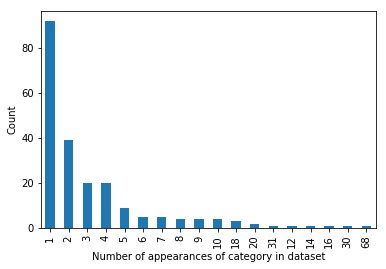

In [5]:
ax = rexburg_venues['category'].value_counts().value_counts().plot.bar()

ax.set_ylabel('Count')
ax.set_xlabel('Number of appearances of category in dataset');

The top 50 categories.

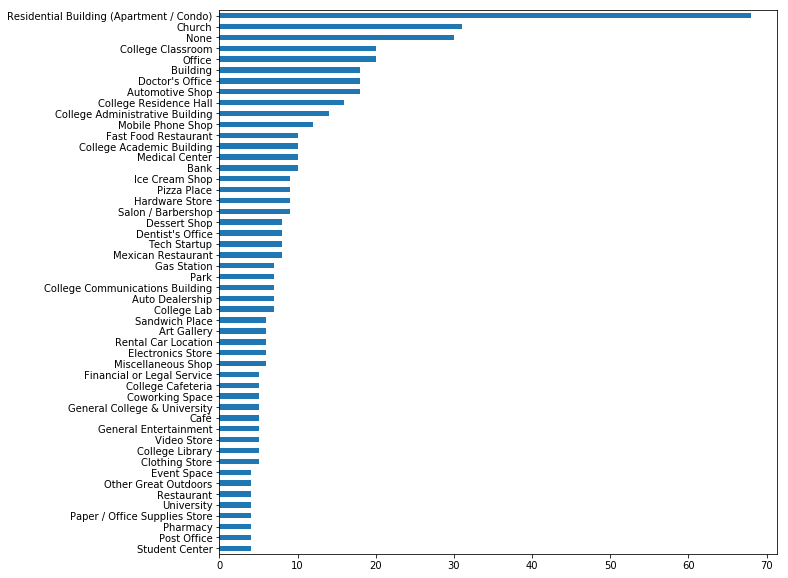

In [6]:
rexburg_venues['category'].value_counts()[:50].sort_values(
    ).plot.barh(figsize=(10,10));

"None" is a top category. Let's deal with that.

### Deal with blank categories

In [7]:
len(rexburg_venues[rexburg_venues['category'].str.contains('None')
                  ].sort_values(by='venue').iloc[:, -4:])

30

In [8]:
# [Delete]
venues_to_delete = (
"""Alterra Pest Control
CALl
Dr. Gates
SSI
Spencer W. Kimball 292 Conference Room
The Dorms
The Hays'
The Lions Den
The Minariks
The Moseley's
Williams Engineering Buiding
wwe Universe
Upper Valley Vet
""".splitlines())

rexburg_venues.drop(
    rexburg_venues[(rexburg_venues['venue'].isin(venues_to_delete)) & 
                   (rexburg_venues['category'] == 'None')].index,
    inplace=True)

In [9]:
category_updates = {}

# Automotive Shop
category_updates = cf.add_category_change(
    'Automotive Shop',
    "0500 Mechanics|Tire Factory".split('|'), 
    category_updates)

# Church
category_updates = cf.add_category_change(
    'Church', 
    ['Stonebridge Ward Chapel'], 
    category_updates)

# College Administrative Building
category_updates = cf.add_category_change(
    'College Administrative Building',
    "BYU-Idaho Alumni Center|Ricks Hall".split('|'), 
    category_updates)

# High School
category_updates = cf.add_category_change(
    'High School',
    ['Madison High School'], 
    category_updates)

# Hotel
category_updates = cf.add_category_change(
    'Hotel',
    "Comfort Inn|Days Inn".split('|'), 
    category_updates)

# Lighting Store
category_updates = cf.add_category_change(
    'Lighting Store', 
    ['Wolfe Lighting & Accents'], 
    category_updates)

# Mexican Restaurant
category_updates = cf.add_category_change(
    'Mexican Restaurant',
    "Izcalli Mexican Food|Tacos Izcalii|Taqueria la Fondita".split('|'), 
    category_updates)

# Movie Theater
category_updates = cf.add_category_change(
    'Movie Theater', 
    ['paramount twin'], 
    category_updates)

# Park
category_updates = cf.add_category_change(
    'Park', 
    ['Slide Hill'], 
    category_updates)

# Post Office
category_updates = cf.add_category_change(
    'Post Office', 
    ['USPS office'], 
    category_updates)

# Real Estate Office
category_updates = cf.add_category_change(
    'Real Estate Office', 
    ['Century 21'], 
    category_updates)

# Residential Building (Apartment / Condo)
category_updates = cf.add_category_change(
    'Residential Building (Apartment / Condo)',
    "Aalita|Greenbrier|Twin Pines Manor|West Tisbury|Allen Ridge".split('|'), 
    category_updates)

# Tanning Salon
category_updates = cf.add_category_change(
    'Tanning Salon',
    ['Radiance Tanning & Salon'], 
    category_updates)

In [10]:
for new_category, venues_to_change in category_updates.items():
    rexburg_venues.loc[
        (rexburg_venues['venue'].isin(venues_to_change)) & 
        (rexburg_venues['category'] == 'None'),
        'category'] = new_category

In [11]:
rexburg_venues[rexburg_venues['category'].str.contains('None')
              ].sort_values(by='venue').iloc[:, -4:]

,venue,v_lat,v_long,category


In [12]:
if len(rexburg_venues[rexburg_venues['category'].str.contains('None')]) != 0:
    raise ValueError(
            'Blank categories exist and must be resolved. See cell above.')

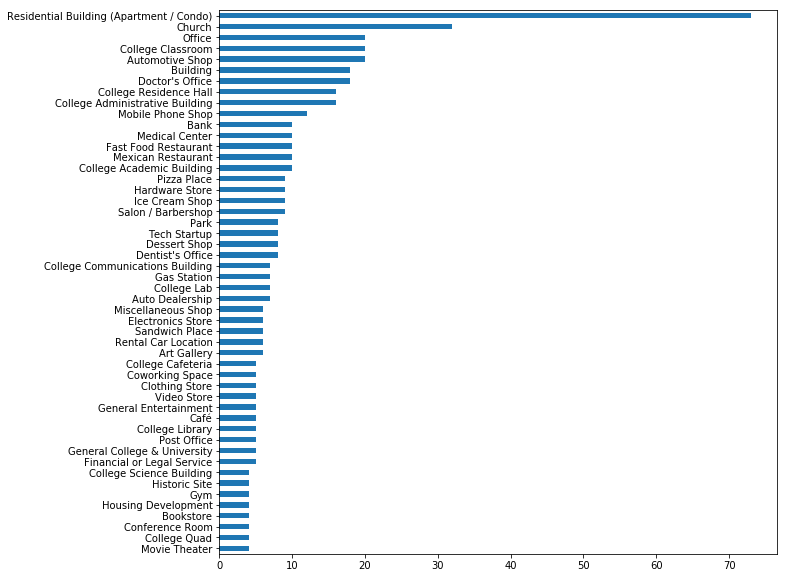

In [13]:
rexburg_venues['category'].value_counts().sort_values()[-50:].plot.barh(
    figsize=(10,10));

### Venue categories, groups, & types

Categories may be too granular for some of our purposes. For example, we may want to see all places to get food, but grocery stores and restaurants will have separate categories.

We'll get the category hierarchy from the Foursquare API (the code is in the `capstone_functions.py` file) and add category groups and venue types to the dataset.

In [14]:
cf.categories.shape

(941, 3)

In [15]:
rexburg_venues['group'] = rexburg_venues['category'].apply(
    lambda x: cf.map_category_group(x, 1))
rexburg_venues['type'] = rexburg_venues['category'].apply(
    lambda x: cf.map_category_group(x, 0))
rexburg_venues.head()

,grid_section_lat,grid_section_long,venue,v_lat,v_long,category,group,type
0,43.839,-111.805791,Madison County Fair,43.830932,-111.796751,Flea Market,Flea Market,Shop & Service
1,43.839,-111.805791,The Church of Jesus Christ of Latter-day Saints,43.829912,-111.800706,Church,Spiritual Center,Professional & Other Places
2,43.839,-111.805791,Nature Park,43.834798,-111.801264,Park,Park,Outdoors & Recreation
3,43.839,-111.805791,Eagle park,43.837360,-111.798076,Park,Park,Outdoors & Recreation
4,43.839,-111.805791,Great Scott's,43.825128,-111.788920,Gas Station,Gas Station,Shop & Service


In [16]:
rexburg_apartments = rexburg_venues[rexburg_venues['category'
                                                  ].str.contains('Resid')]
rexburg_food = rexburg_venues[rexburg_venues['type'
                                            ].str.contains('Food')]
rexburg_recreation = rexburg_venues[rexburg_venues['type'
                                                  ].str.contains('Outd')]

### Vizualizing venues

Let's plot apartments, food, and recreation on the map.

In [17]:
map_venues = cf.draw_rexburg_map()

for lat, long, label in zip(rexburg_apartments.v_lat, 
                            rexburg_apartments.v_long, 
                            rexburg_apartments.venue):
    folium.CircleMarker(
        [lat, long],
        radius=3,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.5,
        weight=1
        ).add_to(map_venues)

for lat, long, label in zip(rexburg_food.v_lat, 
                            rexburg_food.v_long, 
                            rexburg_food.venue):
    folium.CircleMarker(
        [lat, long],
        radius=3,
        popup=label,
        fill=True,
        color='red',
        fill_color='red',
        fill_opacity=0.5,
        weight=1
        ).add_to(map_venues)

for lat, long, label in zip(rexburg_recreation.v_lat, 
                            rexburg_recreation.v_long, 
                            rexburg_recreation.venue):
    folium.CircleMarker(
        [lat, long],
        radius=3,
        popup=label,
        fill=True,
        color='green',
        fill_color='green',
        fill_opacity=0.5,
        weight=1
        ).add_to(map_venues)
    
map_venues

## Export data 

In [18]:
rexburg_venues.to_csv('data/rexburg_venues_cleaned.csv', index=False)

----